<a href="https://colab.research.google.com/github/Densu341/belajar-ai/blob/main/DeniIrawan_20230019_AI03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Dengan Support Vector Machine (SVM)

[Belajar Mudah Support Vector Machine](https://www.youtube.com/watch?v=MQBBE0m9pkI)

Dalam klasifikasi ada 2 hal yang harus diperhatikan. Pertama, fitur. Kedua, label. Fitur biasa disebut juga atribut. Label biasa juga disebut kelas. Dalam praktikum ini, kita akan menggunakan data gambar bilangan 0, 1, 2, 3, 4, 5, 6, 7, 8 dan 9. Jumlah total gambar ada 1797 sebagai sampel fitur, jumlah kelas ada 10. Dataset berasal dari **MNIST Handwritten Digits**.

Data latih adalah data yang digunakan untuk memberi pembelajaran kepada mesin agar mengenali gambar-gambar bilangan. Jumlah data latih ada 80% total sampel. Hasil belajar biasa disebut model.

Data tes adalah data yang digunakan untuk mengevaluasi model yang dihasilkan. Jumlah data tes ada 20% total sampel.

Pada praktikum ini kita menggunakan algoritma klasifikasi **Support Vector Machine (SVM)**. Selain SVM, ada beberapa algoritma lainnya : Naive Bayes, Random Forest, Decision Tree, Linear Regression, dsb.

Bagaimana kita tahu model yang kita buat memiliki performa bagus atau tidak ? Kita menggunakan metrik atau pengukuran **accuracy score**, **confusion matrix** dan **Classification Report**.


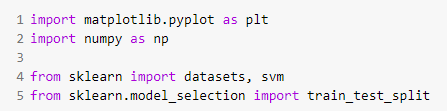

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

## Dataset

Dataset terdiri dari gambar digit 8x8 pixel. Atribut gambar menyimpan array 8x8 dari nilai skala abu-abu untuk setiap gambar. Kita akan menggunakan array ini untuk memvisualisasikan 4 gambar pertama.

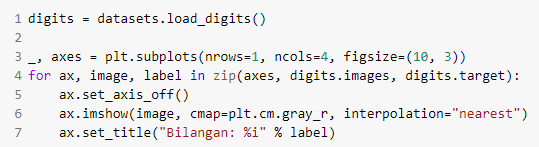

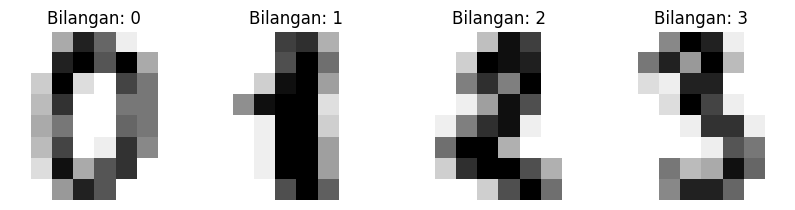

In [3]:
from pandas.core.missing import interpolate_2d
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target) :
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Bilangan: %i" %label)

## Klasifikasi

Untuk melakukan klasifikasi pada data ini, kita perlu:

1. Meratakan gambar, mengubah setiap larik 2-D nilai skala abu-abu dari bentuk (8, 8) menjadi bentuk (64,). Selanjutnya, seluruh dataset akan berbentuk (n_samples, n_features), di mana n_samples adalah jumlah gambar dan n_features adalah jumlah total pixel pada setiap gambar.

2. Membagi data menjadi **data latih** dan **data uji**
3. Menerapkan algoritma SVM pada data latih.
4. Model klasifikasi yang dihasilkan selanjutnya digunakan untuk memprediksi nilai digit untuk sampel dalam data uji.

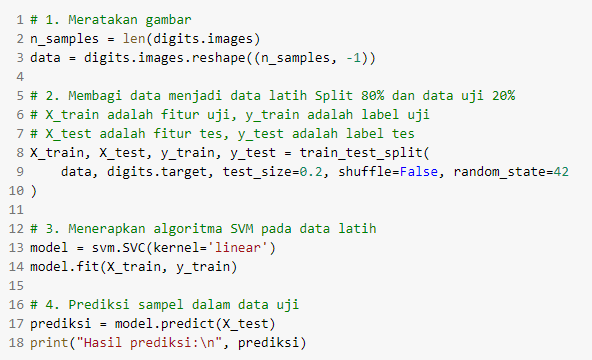

In [6]:
# 1. Meratakan gambar
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# 2. Membagi data menjadi data latih split 80% dan data uji 20%
# X_train adalah fitur uji, y_train adalah label uji
# X_test adalah fitur tes, y_test adalah label tes
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False, random_state=42
)

# 3. Menerapkan algoritma SVM pada data latih
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# 4. Prediksi sampel dalam data uji
prediksi = model.predict(X_test)
print("Hasil prediksi: \n", prediksi)

Hasil prediksi: 
 [2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6
 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 3 2 0 0 9 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6
 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 3 0 7 9 8 0 1 2
 3 4 5 1 8 1 9 0 1 2 3 4 5 6 3 0 1 2 3 4 5 6 7 1 9 4 9 5 5 6 5 0 9 8 9 8 4
 1 7 7 3 5 1 0 0 2 2 4 8 2 0 1 2 6 8 3 7 3 3 4 6 6 6 9 9 1 5 0 9 5 2 8 0 1
 7 6 3 2 1 7 8 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 2 5 7 8
 5 9 4 1 0 1 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 8 4 5 6 7 8 9 0 1 2 8 4 5 6 7 8
 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 8 8 7 5 8 4 6
 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 5 1 4 0 5
 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]


## Metrics / Pengukuran

### Accuracy Score

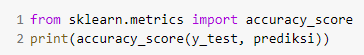

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediksi))

0.9305555555555556


### Confusion Matrix

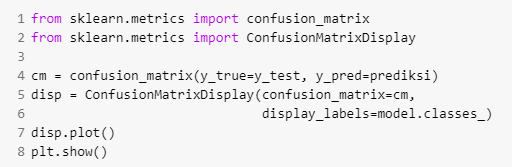

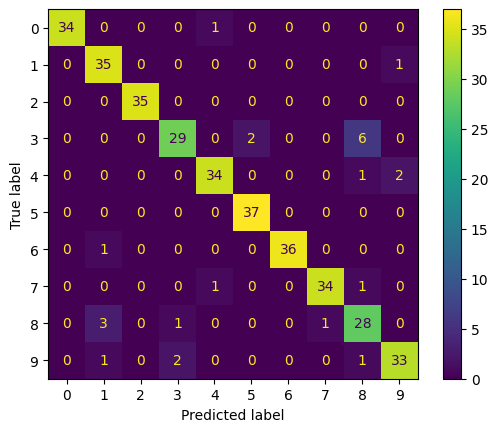

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test, y_pred=prediksi)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

### Classification Report

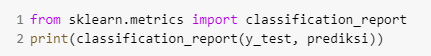

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.88      0.97      0.92        36
           2       1.00      1.00      1.00        35
           3       0.91      0.78      0.84        37
           4       0.94      0.92      0.93        37
           5       0.95      1.00      0.97        37
           6       1.00      0.97      0.99        37
           7       0.97      0.94      0.96        36
           8       0.76      0.85      0.80        33
           9       0.92      0.89      0.90        37

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



## Visualisasi hasil prediksi

Berikut kita visualkan 4 gambar sampel tes pertama, dan menampilkan nilai prediksinya.

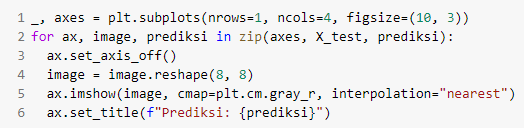

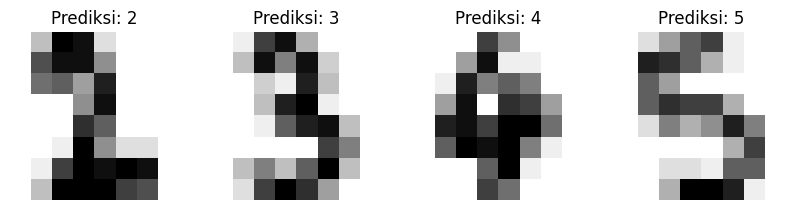

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, prediksi in zip(axes, X_test, prediksi) :
  ax.set_axis_off()
  image = image.reshape(8, 8)
  ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f"Prediksi: {prediksi}")